In [108]:
from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statsmodels.stats.weightstats import _zconfint_generic, _tconfint_generic
import scipy.stats as stats

In [109]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Первое задание. 
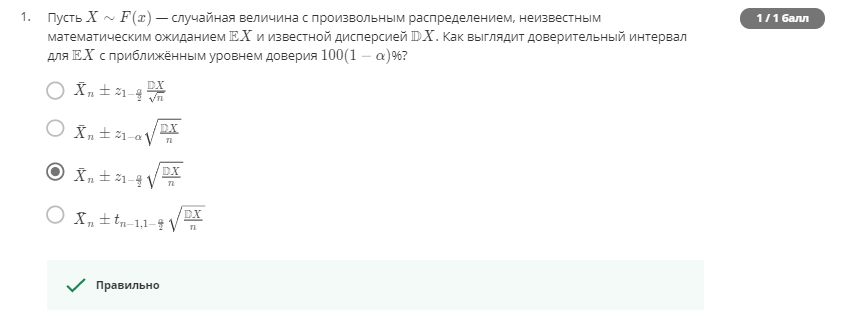

Второе задание.

Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на миллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.
water.txt
Постройте 95% доверительный интервал для средней годовой смертности в больших городах. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.
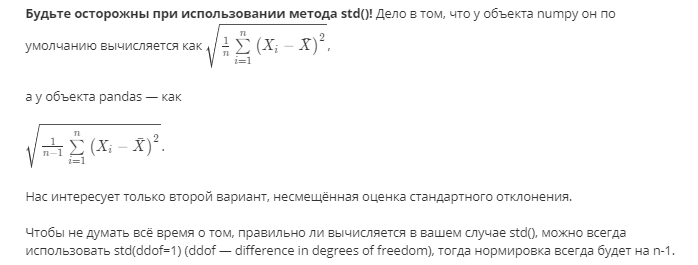

In [110]:
data = pd.read_csv("water.txt", delimiter="\t")
data

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


In [111]:
mortality_data = pd.DataFrame({"mortality": data['mortality']})
mortality_data_mean = mortality_data.mean()
mortality_data_std = mortality_data.std(ddof=1)/sqrt(len(mortality_data))


In [112]:
print ("Доверительный интервал, 2 задание: ", _tconfint_generic(mortality_data_mean, mortality_data_std,
                                                                       len(mortality_data) - 1,
                                                                       0.05, 'two-sided'))

Доверительный интервал, 2 задание:  (mortality    1476.083341
dtype: float64, mortality    1572.211741
dtype: float64)


Третье задание.

На данных из предыдущего вопроса постройте 95% доверительный интервал для средней годовой смертности по всем южным городам. Чему равна его верхняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [113]:
mortality_data_south = pd.DataFrame({"mortality": data['mortality'].loc[data['location'] == 'South']})
mortality_data_south_mean = mortality_data_south.mean()
mortality_data_south_std = mortality_data_south.std(ddof=1)/sqrt(len(mortality_data_south))


In [114]:
print ("Доверительный интервал, 3 задание: ", _tconfint_generic(mortality_data_south_mean, mortality_data_south_std,
                                                                       len(mortality_data_south) - 1,
                                                                       0.05, 'two-sided'))

Доверительный интервал, 3 задание:  (mortality    1320.151746
dtype: float64, mortality    1433.463638
dtype: float64)


Четвертое задание.
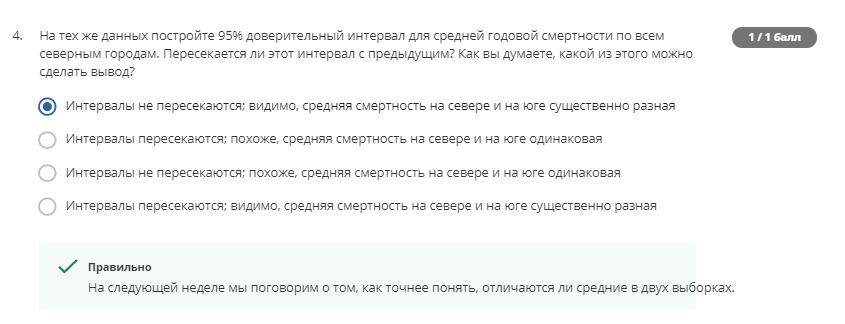

In [115]:
mortality_data_north = pd.DataFrame({"mortality": data['mortality'].loc[data['location'] == 'North']})
mortality_data_north_mean = mortality_data_north.mean()
mortality_data_north_std = mortality_data_north.std(ddof=1)/sqrt(len(mortality_data_north))


In [116]:
print ("Доверительный интервал для севера по смертности: ", _tconfint_generic(mortality_data_north_mean, mortality_data_north_std,
                                                                       len(mortality_data_north) - 1,
                                                                       0.05, 'two-sided'))

Доверительный интервал для севера по смертности:  (mortality    1586.560525
dtype: float64, mortality    1680.639475
dtype: float64)


Пятое задание.

Пересекаются ли 95% доверительные интервалы для средней жёсткости воды в северных и южных городах?

In [117]:
mortality_data_south = pd.DataFrame({"hardness": data['hardness'].loc[data['location'] == 'South']})
mortality_data_south_mean = mortality_data_south.mean()
mortality_data_south_std = mortality_data_south.std(ddof=1)/sqrt(len(mortality_data_south))

In [118]:
print ("Доверительный интервал для юга по жесткости ", _tconfint_generic(mortality_data_south_mean, mortality_data_south_std,
                                                                       len(mortality_data_south) - 1,
                                                                       0.05, 'two-sided'))

Доверительный интервал для юга по жесткости  (hardness    53.467199
dtype: float64, hardness    86.071263
dtype: float64)


In [119]:
mortality_data_north = pd.DataFrame({"hardness": data['hardness'].loc[data['location'] == 'North']})
mortality_data_north_mean = mortality_data_north.mean()
mortality_data_north_std = mortality_data_north.std(ddof=1)/sqrt(len(mortality_data_north))


In [120]:
print ("Доверительный интервал для севера по жесткости ", _tconfint_generic(mortality_data_north_mean, mortality_data_north_std,
                                                                       len(mortality_data_north) - 1,
                                                                       0.05, 'two-sided'))

Доверительный интервал для севера по жесткости  (hardness    21.422487
dtype: float64, hardness    39.377513
dtype: float64)


Шестое задание

![image.png](attachment:image.png)

In [121]:
np.ceil((stats.norm.ppf(1-0.05/2) / 0.1)**2)

385.0

In [83]:
mortality_data_south = pd.DataFrame({"hardness": data['hardness'].loc[data['location'] == 'South']})
mortality_data_south_mean = mortality_data_south.mean()
mortality_data_south_std = mortality_data_south.std(ddof=1)/sqrt(len(mortality_data_south))

In [86]:
print ("Доверительный интервал для юга по жесткости ", _tconfint_generic(mortality_data_south_mean, mortality_data_south_std,
                                                                       len(mortality_data_south) - 1,
                                                                       0.05, 'two-sided'))

Доверительный интервал для юга по жесткости  (hardness    53.467199
dtype: float64, hardness    86.071263
dtype: float64)


In [87]:
mortality_data_north = pd.DataFrame({"hardness": data['hardness'].loc[data['location'] == 'North']})
mortality_data_north_mean = mortality_data_north.mean()
mortality_data_north_std = mortality_data_north.std(ddof=1)/sqrt(len(mortality_data_north))


In [88]:
print ("Доверительный интервал для севера по жесткости ", _tconfint_generic(mortality_data_north_mean, mortality_data_north_std,
                                                                       len(mortality_data_north) - 1,
                                                                       0.05, 'two-sided'))

Доверительный интервал для севера по жесткости  (hardness    21.422487
dtype: float64, hardness    39.377513
dtype: float64)


Шестое задание

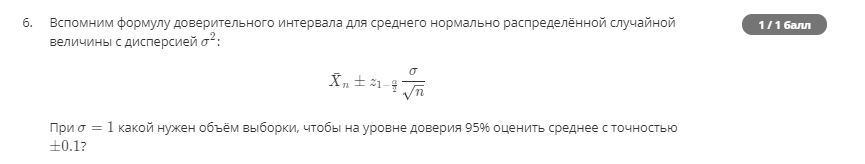

In [93]:
np.ceil((stats.norm.ppf(1-0.05/2) / 0.1)**2)

385.0